## Libraries Imported

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data preprocessing

### Training Data Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(    
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',    
    labels="inferred",    
    label_mode="categorical",    
    class_names=None,    
    color_mode="rgb",    
    batch_size=32,    
    image_size=(128, 128),    
    shuffle=True,    
    seed=None,    
    validation_split=None,    
    subset=None,    
    interpolation="bilinear",    
    follow_links=False,    
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(    
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',    
    labels="inferred",    
    label_mode="categorical",    
    class_names=None,    
    color_mode="rgb",    
    batch_size=32,   
    image_size=(128, 128),   
    shuffle=True,   
    seed=None,    
    validation_split=None,    
    subset=None,    
    interpolation="bilinear",    
    follow_links=False,    
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for i,j in training_set:    
    print(i,i.shape)    
    print(j,j.shape)   
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

### To avoid Overshooting
1. Learning rate is reduced to 0.0001 from 0.001
2. There may be a chance of underfitting,so the number of neurons may be increased
3. More convolution layers may be added to extract more features from images as there may be a possibility that model is unable to capture relevant features or model is confused due to the lack of features.

## Model

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [ ]:
## More Convolution layers to extract more features.

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25)) # To avoid overfitting.

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu')) # To increase number of neurons, units value is increased here.

In [19]:
model.add(Dropout(0.4))

In [20]:
## Output layer
model.add(Dense(units=38,activation='softmax'))

## Compiling model

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(    
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [23]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1732022484.837294     169 service.cc:145] XLA service 0x7c25ec014f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732022484.837365     169 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   5/2197 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - accuracy: 0.0110 - loss: 3.8448      

I0000 00:00:1732022493.017391     169 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1732022493.026157     169 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4215 - loss: 2.0425

I0000 00:00:1732022611.188599     170 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 67ms/step - accuracy: 0.4216 - loss: 2.0421 - val_accuracy: 0.8400 - val_loss: 0.4970
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.8444 - loss: 0.4944 - val_accuracy: 0.8816 - val_loss: 0.3698
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9072 - loss: 0.2859 - val_accuracy: 0.9271 - val_loss: 0.2271
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.9352 - loss: 0.1956 - val_accuracy: 0.9467 - val_loss: 0.1624
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.9531 - loss: 0.1385 - val_accuracy: 0.9280 - val_loss: 0.2370
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.9637 - loss: 0.1103 - val_accuracy: 0.9579 - val_loss: 0.1336
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.9702 - loss: 0.0900 - val_accuracy: 0.9550 - val_loss: 0.1483
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - accuracy: 0.9746 - loss: 0.0

## Evaluation of the model

In [24]:
# Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9930 - loss: 0.0211


In [25]:
print(train_loss,train_acc)

0.019010115414857864 0.9939967393875122


In [26]:
# Evaluation on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9745 - loss: 0.0974


In [27]:
print(val_loss,val_acc)

0.09694726765155792 0.9738789200782776


## Saving Model

In [29]:
model.save('trained_model_1.h5')

In [30]:
model.save('trained_model_1.keras')

In [31]:
training_history.history

{'accuracy': [0.6231168508529663,
  0.8660502433776855,
  0.91741943359375,
  0.9417597055435181,
  0.9565402865409851,
  0.9662564992904663,
  0.9724304676055908,
  0.9765416979789734,
  0.9801123738288879,
  0.982801079750061],
 'loss': [1.2774763107299805,
  0.4252825379371643,
  0.25636109709739685,
  0.17708607017993927,
  0.13105390965938568,
  0.1023104339838028,
  0.08335895091295242,
  0.07239934802055359,
  0.061016879975795746,
  0.05335824191570282],
 'val_accuracy': [0.8400295972824097,
  0.881572961807251,
  0.9270999431610107,
  0.9467334151268005,
  0.9279535412788391,
  0.9579444527626038,
  0.9550421237945557,
  0.9648873209953308,
  0.9661962389945984,
  0.9738789200782776],
 'val_loss': [0.49695533514022827,
  0.3698161840438843,
  0.2271212935447693,
  0.16236494481563568,
  0.236958846449852,
  0.13358640670776367,
  0.1483200490474701,
  0.1167697012424469,
  0.1083325669169426,
  0.0969473272562027]}

In [32]:
# Recording History in json
import json
with open('training_hist.json','w') as f:    
    json.dump(training_history.history,f)

## Accuracy Visualization

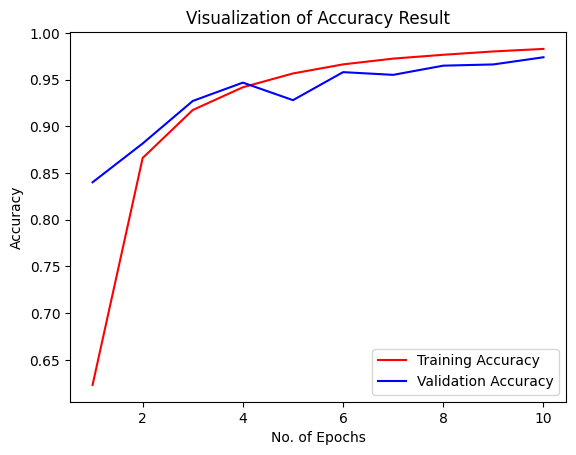

In [37]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Loss visualization

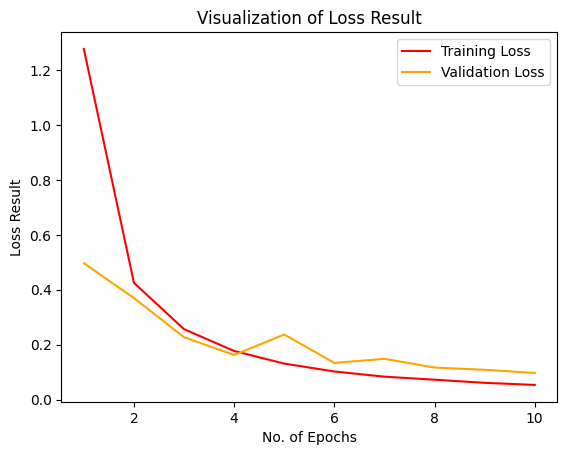

In [39]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='orange', label='Validation Loss')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss Result")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

### Other Metrics

In [40]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [41]:
test_set = tf.keras.utils.image_dataset_from_directory(    
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',    
    labels="inferred",    
    label_mode="categorical",   
    class_names=None,    
    color_mode="rgb",   
    batch_size=32,   
    image_size=(128, 128),  
    shuffle=False,  
    seed=None,  
    validation_split=None,  
    subset=None,  
    interpolation="bilinear",  
    follow_links=False,   
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [42]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step


(array([[1.00000000e+00, 2.24800276e-10, 3.78916869e-13, ...,
         7.90310278e-18, 2.34299133e-16, 5.14220097e-16],
        [9.99993682e-01, 1.96665113e-07, 1.33402907e-11, ...,
         2.81569083e-14, 7.17745396e-15, 1.00903023e-13],
        [1.00000000e+00, 8.36027636e-11, 4.90305333e-13, ...,
         1.09332577e-18, 1.48721886e-15, 7.25939084e-15],
        ...,
        [9.96855051e-14, 1.07521919e-16, 5.23340364e-11, ...,
         5.28225162e-15, 5.13800021e-14, 1.00000000e+00],
        [3.14078902e-11, 1.32149439e-14, 1.46534132e-10, ...,
         5.52942512e-13, 3.89989646e-12, 9.99999881e-01],
        [1.27186536e-18, 5.76770211e-22, 1.52022810e-17, ...,
         9.52113057e-22, 7.14691184e-19, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [43]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [44]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [45]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

### Precision, recall, F1 score and support

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.96      0.97       504
                                 Apple___Black_rot       0.99      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.98      1.00      0.99       440
                                   Apple___healthy       0.96      0.97      0.97       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.94      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.98      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.91      0.

## Confusion matrix

In [47]:
cm = confusion_matrix(Y_true,predicted_categories)
cm,cm.shape

(array([[486,   0,   0, ...,   0,   0,   0],
        [  0, 495,   0, ...,   0,   0,   0],
        [  0,   0, 439, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 487,   0,   0],
        [  0,   0,   1, ...,   0, 443,   0],
        [  0,   0,   0, ...,   0,   0, 478]]),
 (38, 38))

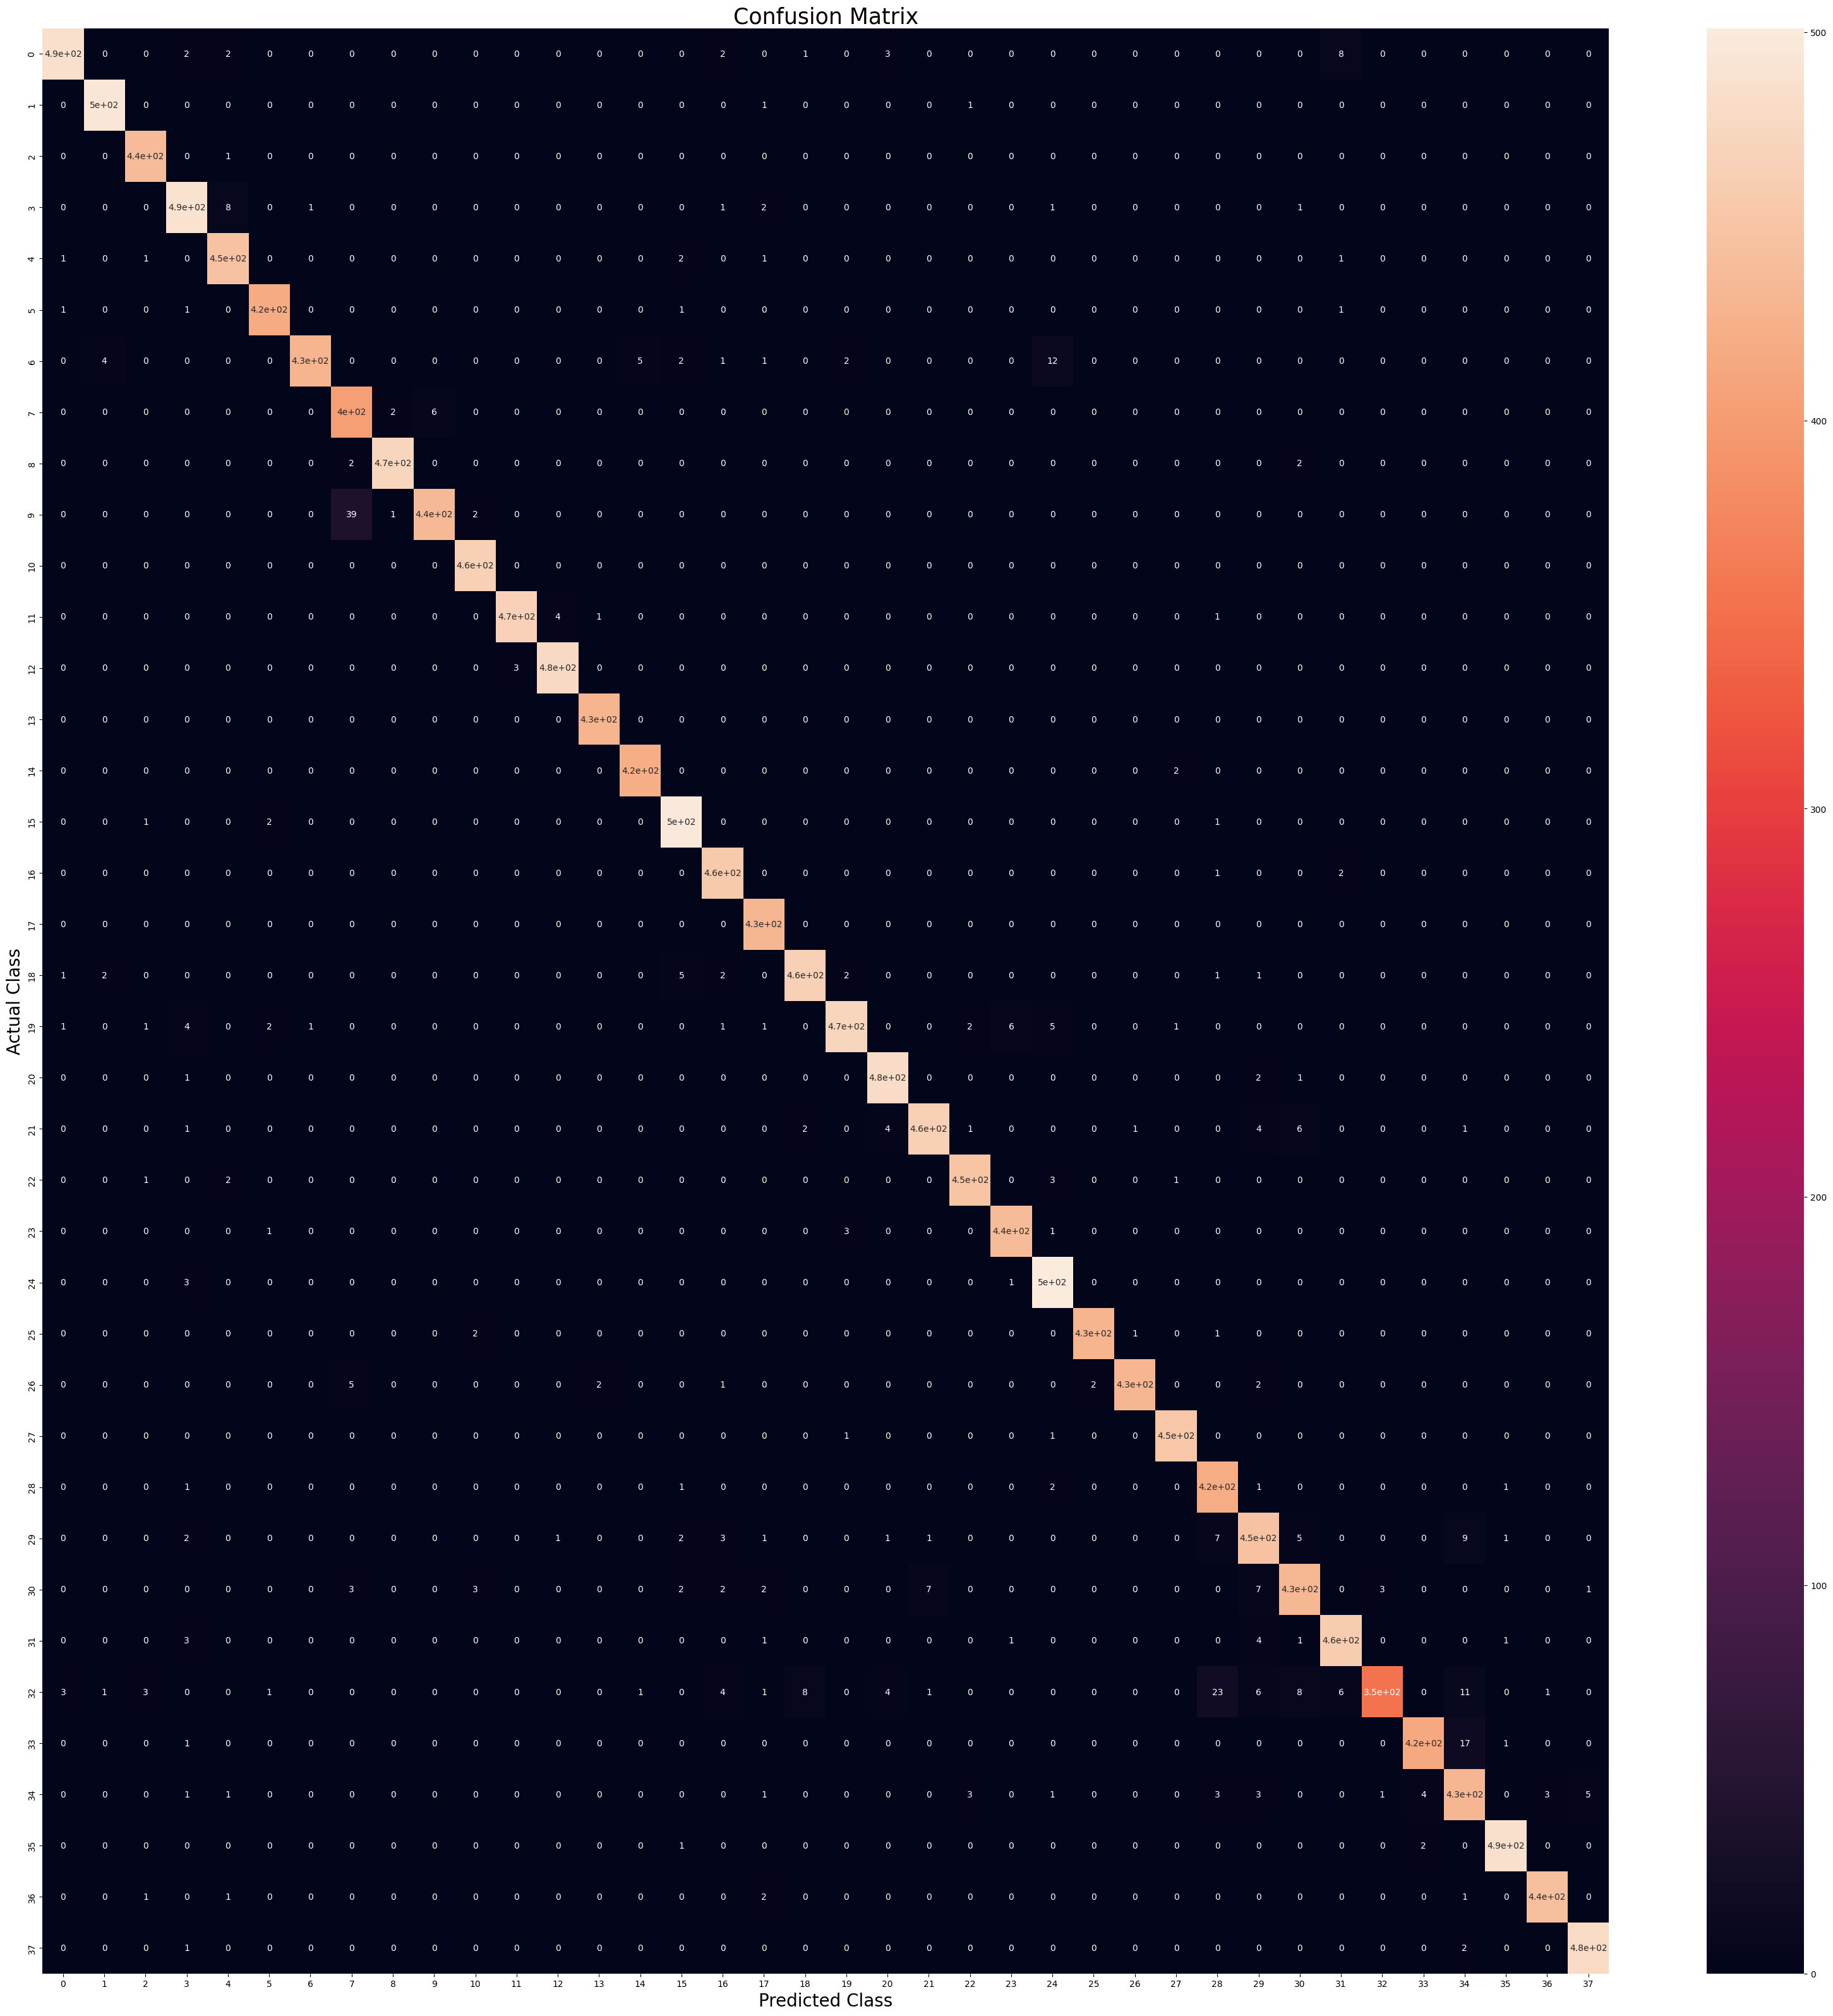

In [49]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel('Predicted Class',fontsize=20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('Confusion Matrix',fontsize=25)
plt.show()